In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/galaxy-zoo-the-galaxy-challenge/all_ones_benchmark.zip
/kaggle/input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip
/kaggle/input/galaxy-zoo-the-galaxy-challenge/central_pixel_benchmark.zip
/kaggle/input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip
/kaggle/input/galaxy-zoo-the-galaxy-challenge/all_zeros_benchmark.zip
/kaggle/input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip


In [2]:
data = pd.read_csv("../input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip",
                   compression="zip")

#data = pd.read_csv('training_solutions_rev1.csv')
data.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [3]:
data.shape

(61578, 38)

In [4]:
def append_ext(filename):
    """ Appends `.jpg` file extension to a filename """
    return f"{filename}.jpg"
    #return filename + '.jpg'

#applying the function to the GalaxyID colunm
data["GalaxyID"] = data["GalaxyID"].apply(append_ext)

#printing the first five row of the dataframe to view the changes
data.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [5]:
new_data = data[((data["Class1.1"] >= .8) | (data["Class1.2"] >= .8))].reset_index(drop=True)
print(new_data.shape)
new_data.head(5)

(24273, 38)


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.00000,0.054649,0.081974,0.081974,0.327894
2,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.000000,0.208685,0.179056,0.000000,0.032728,0.14098,0.000000,0.000000,0.089185,0.124848
3,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.141605,0.000000,0.007855,0.008768,0.000000,0.00000,0.000000,0.000000,0.000000,0.016623
4,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.142815,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [6]:
new_data.drop_duplicates(inplace=True)
new_data.shape


(24273, 38)

In [7]:
new_data.isnull().sum().sum()

0

In [8]:
conditions = [new_data["Class1.1"] >= 0.8, 
              new_data["Class1.2"] >= 0.8]

#define choices
choices = ["elliptical", "spiral"]

#create new column in DataFrame that displays results of comparisons
new_data["class"] = np.select(conditions, choices, default="Tie")

new_data

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,class
0,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,elliptical
1,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894,spiral
2,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.208685,0.179056,0.000000,0.032728,0.140980,0.000000,0.000000,0.089185,0.124848,spiral
3,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.000000,0.007855,0.008768,0.000000,0.000000,0.000000,0.000000,0.000000,0.016623,spiral
4,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,spiral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24268,999786.jpg,0.800415,0.165614,0.033971,0.000000,0.165614,0.044163,0.121451,0.089182,0.076432,...,0.044591,0.044591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089182,elliptical
24269,999795.jpg,0.129878,0.867781,0.002341,0.066500,0.801281,0.598990,0.202291,0.550301,0.250981,...,0.249742,0.172674,0.127884,0.142373,0.048823,0.038712,0.000000,0.123529,0.196864,spiral
24270,999875.jpg,0.020285,0.979715,0.000000,0.207551,0.772164,0.315305,0.456860,0.722483,0.049681,...,0.074294,0.029641,0.618548,0.027295,0.638331,0.000000,0.000000,0.000000,0.056857,spiral
24271,999950.jpg,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,elliptical


In [9]:
print(new_data[new_data["class"] == "elliptical"].shape)

print(new_data[new_data["class"] == "spiral"].shape)

(8132, 39)
(16141, 39)


In [10]:
df_spiral = new_data[new_data["class"] == "spiral"].sample(n=8000,random_state = 42)
print("This is a sample of spiral galaxies")
print(df_spiral.head(5))
print(df_spiral.shape)

df_elliptical =new_data[new_data["class"] == "elliptical"].sample(n=8000,random_state = 42)
print("And this is a sample of elliptical galaxies")
print(df_elliptical.head(5))
print(df_elliptical.shape)

This is a sample of spiral galaxies
         GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
20666  863568.jpg  0.055449  0.944551  0.000000  0.894966  0.049585  0.000000   
17422  745024.jpg  0.170517  0.829483  0.000000  0.593576  0.235907  0.000000   
23878  985580.jpg  0.096710  0.903290  0.000000  0.903290  0.000000  0.000000   
15765  684719.jpg  0.048381  0.951619  0.000000  0.034938  0.916681  0.287033   
6305   340999.jpg  0.074525  0.897899  0.027576  0.000000  0.897899  0.441543   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
20666  0.049585  0.000000  0.049585  ...   0.000000   0.000000   0.000000   
17422  0.235907  0.000000  0.235907  ...   0.000000   0.000000   0.000000   
23878  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
15765  0.629648  0.790393  0.126288  ...   0.188969   0.427433   0.173989   
6305   0.456356  0.806458  0.091441  ...   0.142079   0.522301   0.142079   

       Class11

In [11]:
frames = [df_spiral, df_elliptical]
df_galaxies = pd.concat(frames)
df_galaxies = df_galaxies[["GalaxyID", "class"]]
df_galaxies.head(5)

,GalaxyID,class
20666,863568.jpg,spiral
17422,745024.jpg,spiral
23878,985580.jpg,spiral
15765,684719.jpg,spiral
6305,340999.jpg,spiral


In [12]:
df_galaxies.shape

(16000, 2)

In [13]:
import zipfile
with zipfile.ZipFile("../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip", 'r') as zip_ref:
    zip_ref.extractall()

Text(0.5, 1.02, 'Elliptical Galaxy')

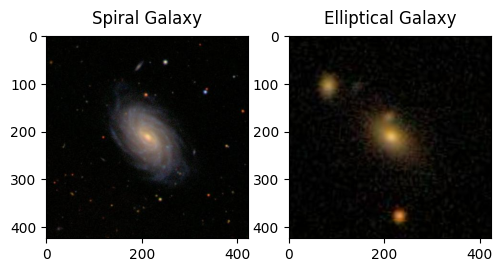

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#images
img= image.load_img("./images_training_rev1/104934.jpg")
img2 = image.load_img("./images_training_rev1/582003.jpg")

#Subplots
plt.figure(figsize=(12,4.5))
plt.subplot(141)
plt.imshow(img)
plt.title("Spiral Galaxy", y=1.02, fontsize=12)

plt.subplot(142)
plt.imshow(img2)
plt.title("Elliptical Galaxy", y=1.02, fontsize=12)

In [15]:
import cv2

print("The images are of size: ")
cv2.imread("./images_training_rev1/104934.jpg").shape

The images are of size: 


(424, 424, 3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import preprocess_input

import numpy as np
import os

In [17]:
datagen = ImageDataGenerator(rescale=1./255.,
                           validation_split=0.2,

)


train_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                          target_size = (224,224),
                                          directory = "./images_training_rev1",
                                          batch_size = 32,
                                          x_col="GalaxyID",
                                          y_col="class",
                                          color_mode="rgb",
                                          class_mode="categorical",
                                          subset="training",
                                          shuffle=True,
                                          seed=42
                                         )
valid_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                            target_size=(224, 224),
                                            directory = "./images_training_rev1",
                                            batch_size=32,
                                            x_col="GalaxyID",
                                            y_col="class",
                                            color_mode="rgb",
                                            class_mode="categorical",
                                            subset="validation",
                                            shuffle=True,
                                            seed=42
                                           ) 

Found 12800 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.


In [18]:
train_generator.class_indices

{'elliptical': 0, 'spiral': 1}

In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(6,6),activation = 'relu',
                                                           input_shape=(224,224,3)),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(32,(5,5),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Flatten(),
                                  
                                  #
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  tf.keras.layers.Dense(256, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                   #
                                  tf.keras.layers.Dense(2, activation='softmax')
                                  ])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 219, 219, 16)   │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 105, 105, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,930,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,169,138 (31.16 MB)

 Trainable params: 8,169,138 (31.16 MB)

 Non-trainable params: 0 (0.00 B)

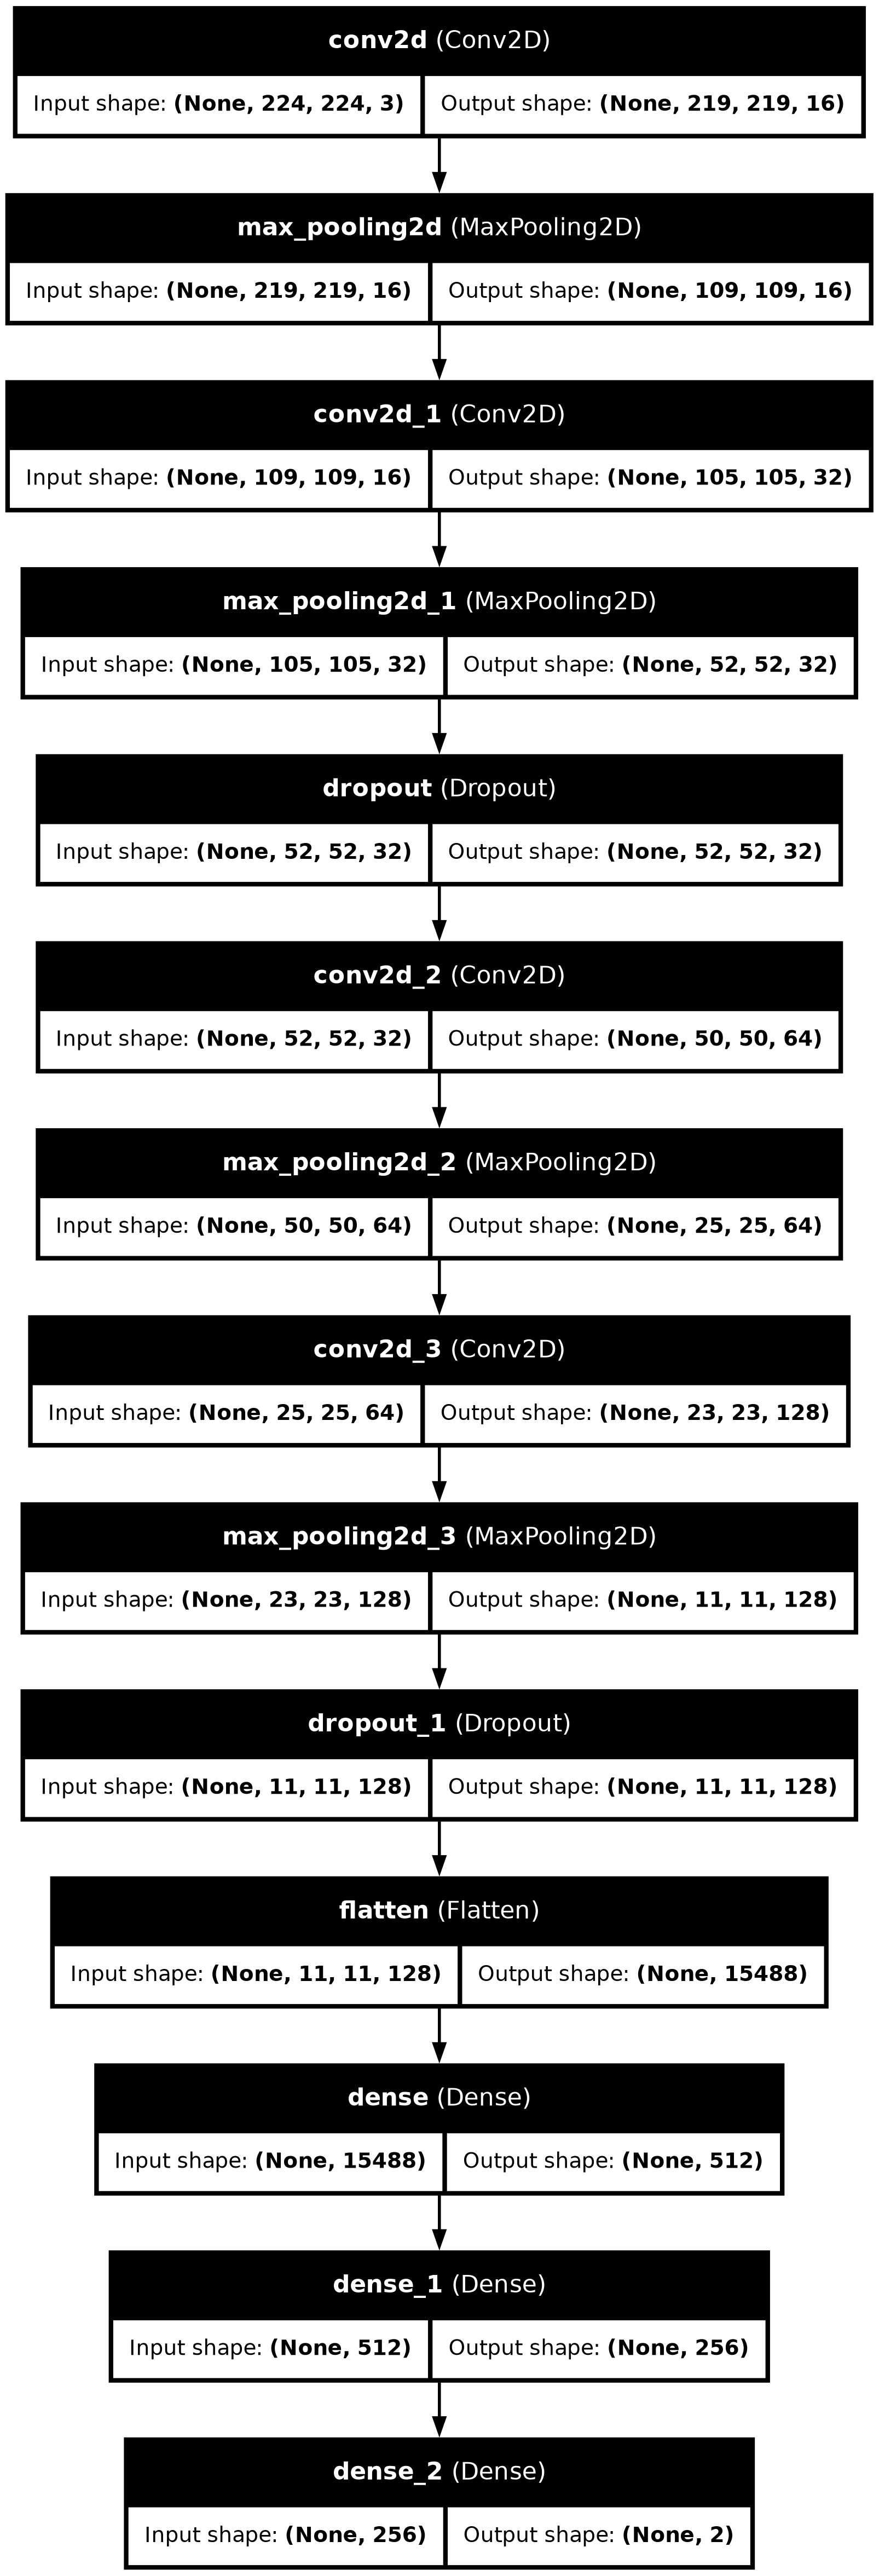

In [20]:
summary = model.summary()
tf.keras.utils.plot_model(model, to_file="model_plot3.png", 
                          show_shapes=True, show_layer_names=True)

In [21]:
model.compile(
loss="categorical_crossentropy",
optimizer=Adam(learning_rate=0.001),
metrics=["accuracy"])

In [22]:
hist = model.fit(train_generator, epochs = 10, validation_data=valid_generator 
                )

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730667624.247323      73 service.cc:145] XLA service 0x798b10002000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730667624.247384      73 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730667624.247388      73 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/400 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.6441 - loss: 0.6636

I0000 00:00:1730667632.823130      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7992 - loss: 0.4345 - val_accuracy: 0.9388 - val_loss: 0.2351
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.9301 - loss: 0.1852 - val_accuracy: 0.9819 - val_loss: 0.0807
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9547 - loss: 0.1251 - val_accuracy: 0.9303 - val_loss: 0.2353
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9616 - loss: 0.0983 - val_accuracy: 0.9388 - val_loss: 0.1685
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9708 - loss: 0.0765 - val_accuracy: 0.9491 - val_loss: 0.1770
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9765 - loss: 0.0644 - val_accuracy: 0.9769 - val_loss: 0.0803
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9837 - loss: 0.0510 - val_accuracy: 0.9653 - val_loss: 0.1147
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9813 - loss: 0.0513 - val_accurac

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Define the model
model2 = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
model2.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-4),
              metrics=["accuracy"])

hist = model2.fit(train_generator,
                 epochs=10,
                 validation_data=valid_generator
                 )

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 94s 124ms/step - accuracy: 0.8759 - loss: 0.2937 - val_accuracy: 0.0244 - val_loss: 4.9651
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.9672 - loss: 0.0871 - val_accuracy: 0.2328 - val_loss: 3.0008
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.9843 - loss: 0.0439 - val_accuracy: 0.4019 - val_loss: 2.3790
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 114ms/step - accuracy: 0.9888 - loss: 0.0298 - val_accuracy: 0.2381 - val_loss: 5.2978
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.9899 - loss: 0.0261 - val_accuracy: 0.4706 - val_loss: 2.8915
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.9937 - loss: 0.0158 - val_accuracy: 0.4191 - val_loss: 2.7528
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.9948 - loss: 0.0132 - val_accuracy: 0.7222 - val_loss: 1.5551
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 47s 116ms/step - accuracy: 0.9936 - loss: 0

In [25]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Create the model
model3 = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification
])

model3.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

hist = model3.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 172s 250ms/step - accuracy: 0.8093 - loss: 0.4070 - val_accuracy: 0.9103 - val_loss: 0.2516
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 237ms/step - accuracy: 0.9646 - loss: 0.0964 - val_accuracy: 0.9500 - val_loss: 0.1442
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 236ms/step - accuracy: 0.9832 - loss: 0.0497 - val_accuracy: 0.9606 - val_loss: 0.1134
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 236ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9756 - val_loss: 0.0885
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 236ms/step - accuracy: 0.9970 - loss: 0.0127 - val_accuracy: 0.9628 - val_loss: 0.1233
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 236ms/step - accuracy: 0.9956 - loss: 0.0172 - val_accuracy: 0.9644 - val_loss: 0.1347
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 236ms/step - accuracy: 0.9979 - loss: 0.0088 - val_accuracy: 0.9628 - val_loss: 0.1545
Epoch 8/10
400/400 ━━━━━━━━━━━━

In [26]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model, without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Define the model
model4 = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # For binary classification
])
model4.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

hist = model4.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 220s 438ms/step - accuracy: 0.8348 - loss: 0.3422 - val_accuracy: 0.8891 - val_loss: 0.2878
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 175s 436ms/step - accuracy: 0.9759 - loss: 0.0684 - val_accuracy: 0.9791 - val_loss: 0.0680
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 175s 436ms/step - accuracy: 0.9812 - loss: 0.0521 - val_accuracy: 0.9538 - val_loss: 0.1292
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 175s 436ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9925 - val_loss: 0.0232
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 175s 437ms/step - accuracy: 0.9908 - loss: 0.0266 - val_accuracy: 0.9966 - val_loss: 0.0087
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 175s 437ms/step - accuracy: 0.9930 - loss: 0.0222 - val_accuracy: 0.9647 - val_loss: 0.1076
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 175s 437ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9856 - val_loss: 0.0387
Epoch 8/10
400/400 ━━━━━━